In [27]:
import pandas as pd
import matplotlib.pyplot as plt
import os

In [28]:
def read_csv(policy_name, dir, is_SB, case, file_or_folder):
    dataframes = []
    filenames = []

    for root, dirs, files in os.walk(dir):
        # Filter directories within the root directory
        dirs[:] = [d for d in dirs if d.startswith(policy_name)]
        # Only proceed if we're in a directory that matches the folder prefix
        if os.path.basename(root).startswith(policy_name):
            # Loop through each file in the directory
            for file in files:
                # Check if file starts with the prefix
                if file.startswith(case):
                    file_path = os.path.join(root, file)
                    try:
                        # Load the file into a DataFrame
                        df = pd.read_csv(file_path)
                        # Store the DataFrame in the dictionary using the path as a key
                        dataframes.append(df)
                        filename = os.path.basename(root) if file_or_folder == 'folder' else file
                        filenames.append(filename)
                    except Exception as e:
                        print(f"Failed to read {file_path}: {e}")
    columns_sb = ['Bike Arrivals', 'Bike Starvations', 'Long Congestions']
    
    columns_ff = ['Escooter Arrivals', 'Escooter Starvations', 'Battery Starvations', 'Battery Violations']
    columns_sol_time = ['Accumulated solution time', 'Number of get_best_action']
    
    fix_dfs = []
    for df in dataframes:
        if case.startswith('sol_time'):
            selected_columns = columns_sol_time 
        elif is_SB:
            selected_columns = columns_sb
        else:
            selected_columns = columns_ff
        
        fix_dfs.append(df[selected_columns])
    return fix_dfs, filenames

In [29]:
def make_pie(column_means):
    # Calculate the percentage contribution of each column's mean
    total_means = column_means.sum()
    percentage_means = (column_means / total_means) * 100

    # Plotting the pie chart
    plt.figure(figsize=(8, 8))  # Adjust the figure size as necessary
    plt.pie(percentage_means, labels=percentage_means.index, autopct='%1.1f%%', startangle=90)
    
    plt.show()

### Rank the results

In [33]:
dir = '/Users/isabellam/NTNU/H2023/Prosjektoppgave/fomo/policies/hlv_master/results/inventory_balance'
dataframes, filenames = read_csv('FF_Base', dir, False, 'FF_Base', 'folder')
filenames

['FF_Base_res10_rad58_B50_I20',
 'FF_Base_res10_rad58_B160_I5',
 'FF_Base_res10_rad58_B85_I15',
 'FF_Base_res10_rad58_B125_I10']

In [34]:
means = []
for i in range(len(dataframes)):
    dataframe = dataframes[i]
    filename = filenames[i]
    
    mean_series = dataframe.mean()
    mean_series['Filename'] = filename
    means.append(mean_series)

new_df = pd.DataFrame(means)
new_df['Sum'] = new_df.drop(columns=['Filename', 'Escooter Arrivals']).sum(axis=1)
new_df['Lost trips percentage'] = round(new_df['Sum'] / new_df[['Escooter Arrivals', 'Sum']].sum(axis=1) * 100, 2)
new_df['Rank failed events'] = new_df['Sum'].rank(method='min')
new_df['Rank p'] = new_df['Lost trips percentage'].rank(method='min')

new_column_order = ['Filename', 'Escooter Arrivals', 'Escooter Starvations', 'Battery Starvations', 'Battery Violations', 'Sum', 'Lost trips percentage', 'Rank failed events', 'Rank p']
new_df = new_df[new_column_order]
new_df = new_df.sort_values('Filename')

new_df

,Filename,Escooter Arrivals,Escooter Starvations,Battery Starvations,Battery Violations,Sum,Lost trips percentage,Rank failed events,Rank p
3,FF_Base_res10_rad58_B125_I10,25780.368421,13074.263158,1949.421053,0.0,15023.684211,36.82,2.0,2.0
1,FF_Base_res10_rad58_B160_I5,26377.210526,12731.684211,1609.315789,0.0,14341.000000,35.22,1.0,1.0
0,FF_Base_res10_rad58_B50_I20,25009.421053,13461.263158,2256.947368,0.0,15718.210526,38.59,4.0,4.0
2,FF_Base_res10_rad58_B85_I15,25287.000000,13233.052632,2112.105263,0.0,15345.157895,37.77,3.0,3.0


## SB TABLE

In [6]:
dataframes2, filenames2 = read_csv('Collab3', dir, True, 'adjustment', 'file')

means2 = []
for i in range(len(dataframes2)):
    dataframe2 = dataframes2[i]
    filename2 = filenames2[i]
    
    mean_series2 = dataframe2.mean()
    mean_series2['Filename'] = filename2
    means2.append(mean_series2)

new_df2 = pd.DataFrame(means2)
new_df2['Sum'] = new_df2.drop(columns=['Filename', 'Bike Arrivals']).sum(axis=1)
new_df2['Lost trips percentage'] = round(new_df2['Sum'] / new_df2[['Bike Arrivals', 'Sum']].sum(axis=1) * 100, 2)
new_df2['Rank failed events'] = new_df2['Sum'].rank(method='min')
new_df2['Rank p'] = new_df2['Lost trips percentage'].rank(method='min')

new_column_order2 = ['Filename', 'Bike Arrivals', 'Bike Starvations', 'Long Congestions', 'Sum', 'Lost trips percentage', 'Rank failed events', 'Rank p']
new_df2 = new_df2[new_column_order2]
new_df2 = new_df2.sort_values('Filename')

new_df2

KeyError: "['Filename', 'Bike Arrivals'] not found in axis"

In [ ]:
merged_df = pd.merge(new_df, new_df2, on='Filename', how='inner')
df = merged_df
df['Rank sum'] = df['Rank failed events_x'] +df['Rank failed events_y']
df

,Filename,Escooter Arrivals,Escooter Starvations,Battery Starvations,Battery Violations,Sum_x,Lost trips percentage_x,Rank failed events_x,Rank p_x,Bike Arrivals,Bike Starvations,Long Congestions,Sum_y,Lost trips percentage_y,Rank failed events_y,Rank p_y,Rank sum
0,adjustment_factor_0.25_Collab3.csv,15865.105263,16864.473684,7949.368421,0.0,24813.842105,61.00,17.0,17.0,11707.368421,141.631579,525.368421,667.000000,5.39,9.0,9.0,26.0
1,adjustment_factor_0.5_Collab3.csv,17907.947368,16159.473684,6646.052632,0.0,22805.526316,56.01,16.0,16.0,11826.894737,114.578947,473.473684,588.052632,4.74,5.0,5.0,21.0
2,adjustment_factor_0.6_Collab3.csv,18809.684211,15682.000000,6254.052632,0.0,21936.052632,53.84,15.0,15.0,11725.157895,93.789474,472.052632,565.842105,4.60,4.0,4.0,19.0
3,adjustment_factor_0.7_Collab3.csv,19028.894737,15571.000000,6104.578947,0.0,21675.578947,53.25,14.0,14.0,11756.315789,102.315789,436.578947,538.894737,4.38,1.0,1.0,15.0
4,adjustment_factor_0.8_Collab3.csv,19239.105263,15521.000000,5933.157895,0.0,21454.157895,52.72,12.0,12.0,11767.210526,87.736842,457.315789,545.052632,4.43,2.0,2.0,14.0
5,adjustment_factor_0.9_Collab3.csv,19117.000000,15819.157895,5815.894737,0.0,21635.052632,53.09,13.0,13.0,11794.631579,91.947368,473.210526,565.157895,4.57,3.0,3.0,16.0
6,adjustment_factor_1.1_Collab3.csv,20395.842105,15291.842105,5011.526316,0.0,20303.368421,49.89,10.0,10.0,11801.000000,104.000000,548.526316,652.526316,5.24,7.0,7.0,17.0
7,adjustment_factor_1.2_Collab3.csv,20780.631579,15133.684211,4743.263158,0.0,19876.947368,48.89,9.0,9.0,11789.684211,98.210526,565.315789,663.526316,5.33,8.0,8.0,17.0
8,adjustment_factor_1.3_Collab3.csv,21340.684211,14996.526316,4358.157895,0.0,19354.684211,47.56,8.0,8.0,11782.263158,97.684211,644.315789,742.000000,5.92,10.0,10.0,18.0
9,adjustment_factor_1.4_Collab3.csv,21676.315789,14763.263158,4231.421053,0.0,18994.684211,46.70,7.0,7.0,11788.578947,98.052632,660.263158,758.315789,6.04,11.0,11.0,18.0


In [ ]:
df['Final Rank'] = df[['Rank p_x', 'Rank p_y']].max(axis=1)
df

,Filename,Escooter Arrivals,Escooter Starvations,Battery Starvations,Battery Violations,Sum_x,Lost trips percentage_x,Rank failed events_x,Rank p_x,Bike Arrivals,Bike Starvations,Long Congestions,Sum_y,Lost trips percentage_y,Rank failed events_y,Rank p_y,Rank sum,Final Rank
0,adjustment_factor_0.25_Collab3.csv,15865.105263,16864.473684,7949.368421,0.0,24813.842105,61.00,17.0,17.0,11707.368421,141.631579,525.368421,667.000000,5.39,9.0,9.0,26.0,17.0
1,adjustment_factor_0.5_Collab3.csv,17907.947368,16159.473684,6646.052632,0.0,22805.526316,56.01,16.0,16.0,11826.894737,114.578947,473.473684,588.052632,4.74,5.0,5.0,21.0,16.0
2,adjustment_factor_0.6_Collab3.csv,18809.684211,15682.000000,6254.052632,0.0,21936.052632,53.84,15.0,15.0,11725.157895,93.789474,472.052632,565.842105,4.60,4.0,4.0,19.0,15.0
3,adjustment_factor_0.7_Collab3.csv,19028.894737,15571.000000,6104.578947,0.0,21675.578947,53.25,14.0,14.0,11756.315789,102.315789,436.578947,538.894737,4.38,1.0,1.0,15.0,14.0
4,adjustment_factor_0.8_Collab3.csv,19239.105263,15521.000000,5933.157895,0.0,21454.157895,52.72,12.0,12.0,11767.210526,87.736842,457.315789,545.052632,4.43,2.0,2.0,14.0,12.0
5,adjustment_factor_0.9_Collab3.csv,19117.000000,15819.157895,5815.894737,0.0,21635.052632,53.09,13.0,13.0,11794.631579,91.947368,473.210526,565.157895,4.57,3.0,3.0,16.0,13.0
6,adjustment_factor_1.1_Collab3.csv,20395.842105,15291.842105,5011.526316,0.0,20303.368421,49.89,10.0,10.0,11801.000000,104.000000,548.526316,652.526316,5.24,7.0,7.0,17.0,10.0
7,adjustment_factor_1.2_Collab3.csv,20780.631579,15133.684211,4743.263158,0.0,19876.947368,48.89,9.0,9.0,11789.684211,98.210526,565.315789,663.526316,5.33,8.0,8.0,17.0,9.0
8,adjustment_factor_1.3_Collab3.csv,21340.684211,14996.526316,4358.157895,0.0,19354.684211,47.56,8.0,8.0,11782.263158,97.684211,644.315789,742.000000,5.92,10.0,10.0,18.0,10.0
9,adjustment_factor_1.4_Collab3.csv,21676.315789,14763.263158,4231.421053,0.0,18994.684211,46.70,7.0,7.0,11788.578947,98.052632,660.263158,758.315789,6.04,11.0,11.0,18.0,11.0


## Merge with solution time

In [19]:
dataframes2, filenames2 = read_csv('Base', dir, True, 'sol_time', 'file')
filenames2

['sol_time_branching_a_4_b_10_Base_FF.csv',
 'sol_time_branching_a_4_b_7_Base_FF.csv',
 'sol_time_branching_a_3_b_2_Base_FF.csv',
 'sol_time_branching_a_6_b_5_Base_FF.csv',
 'sol_time_branching_a_10_b_5_Base_FF.csv',
 'sol_time_branching_a_2_b_1_Base_FF.csv',
 'sol_time_branching_a_5_b_4_Base_FF.csv',
 'sol_time_branching_a_7_b_3_Base_FF.csv',
 'sol_time_branching_a_2_b_4_Base_FF.csv',
 'sol_time_branching_a_5_b_1_Base_FF.csv',
 'sol_time_branching_a_1_b_5_Base_FF.csv',
 'sol_time_branching_a_4_b_2_Base_FF.csv',
 'sol_time_branching_a_4_b_15_Base_FF.csv',
 'sol_time_branching_a_3_b_7_Base_FF.csv',
 'sol_time_branching_a_1_b_15_Base_FF.csv',
 'sol_time_branching_a_3_b_4_Base_FF.csv',
 'sol_time_branching_a_6_b_3_Base_FF.csv',
 'sol_time_branching_a_4_b_1_Base_FF.csv',
 'sol_time_branching_a_5_b_10_Base_FF.csv',
 'sol_time_branching_a_5_b_2_Base_FF.csv',
 'sol_time_branching_a_10_b_3_Base_FF.csv',
 'sol_time_branching_a_2_b_7_Base_FF.csv',
 'sol_time_branching_a_5_b_7_Base_FF.csv',
 'sol

In [20]:
import numpy as np

means2 = []
for i in range(len(dataframes2)):
    dataframe2 = dataframes2[i]
    filename2 = filenames2[i]
    
    mean_series2 = dataframe2.mean()
    mean_series2['Filename'] = filename2[9:]
    means2.append(mean_series2)

new_df2 = pd.DataFrame(means2)

new_df2['avg_solution_time'] = new_df2['Accumulated solution time'].astype(float) / new_df2['Number of get_best_action'].replace(0, np.nan).astype(float)

new_df2['Rank sol_time'] = new_df2['avg_solution_time'].rank(method='min')

new_column_order1 = ['Filename', 'Accumulated solution time', 'Number of get_best_action', 'avg_solution_time', 'Rank sol_time']
new_df2 = new_df2[new_column_order1]
new_df2 = new_df2.sort_values('Filename')

new_df2

,Filename,Accumulated solution time,Number of get_best_action,avg_solution_time,Rank sol_time
35,branching_a_10_b_1_Base_FF.csv,1538.481036,716.684211,2.146665,1.0
52,branching_a_10_b_2_Base_FF.csv,2204.510841,713.578947,3.089372,15.0
20,branching_a_10_b_3_Base_FF.csv,2805.240897,706.000000,3.973429,24.0
39,branching_a_10_b_4_Base_FF.csv,3473.564663,712.263158,4.876800,29.0
4,branching_a_10_b_5_Base_FF.csv,4096.330041,706.842105,5.795255,38.0
26,branching_a_1_b_10_Base_FF.csv,7101.196168,718.894737,9.877936,45.0
14,branching_a_1_b_15_Base_FF.csv,9206.545075,707.947368,13.004561,46.0
44,branching_a_1_b_1_Base_FF.csv,1545.436159,719.684211,2.147381,2.0
43,branching_a_1_b_20_Base_FF.csv,11679.250143,714.684211,16.341833,47.0
45,branching_a_1_b_2_Base_FF.csv,2174.203170,715.526316,3.038607,14.0


In [21]:
merged_df = pd.merge(new_df, new_df2, on='Filename', how='inner')
df = merged_df
df

,Filename,Escooter Arrivals,Escooter Starvations,Battery Starvations,Battery Violations,Sum,Lost trips percentage,Rank failed events,Rank p,Accumulated solution time,Number of get_best_action,avg_solution_time,Rank sol_time
0,branching_a_10_b_1_Base_FF.csv,26817.736842,12512.631579,1332.105263,0.0,13844.736842,34.05,54.0,54.0,1538.481036,716.684211,2.146665,1.0
1,branching_a_10_b_2_Base_FF.csv,27248.421053,12257.894737,1187.263158,0.0,13445.157895,33.04,44.0,44.0,2204.510841,713.578947,3.089372,15.0
2,branching_a_10_b_3_Base_FF.csv,27443.842105,12067.684211,1130.526316,0.0,13198.210526,32.47,35.0,35.0,2805.240897,706.000000,3.973429,24.0
3,branching_a_10_b_4_Base_FF.csv,27719.000000,11803.894737,1111.842105,0.0,12915.736842,31.78,21.0,21.0,3473.564663,712.263158,4.876800,29.0
4,branching_a_10_b_5_Base_FF.csv,27692.842105,11857.157895,1089.842105,0.0,12947.000000,31.86,24.0,25.0,4096.330041,706.842105,5.795255,38.0
5,branching_a_1_b_10_Base_FF.csv,28149.157895,11577.000000,943.210526,0.0,12520.210526,30.79,2.0,2.0,7101.196168,718.894737,9.877936,45.0
6,branching_a_1_b_15_Base_FF.csv,28347.263158,11421.263158,917.947368,0.0,12339.210526,30.33,1.0,1.0,9206.545075,707.947368,13.004561,46.0
7,branching_a_1_b_1_Base_FF.csv,26864.894737,12392.526316,1400.684211,0.0,13793.210526,33.92,53.0,53.0,1545.436159,719.684211,2.147381,2.0
8,branching_a_1_b_20_Base_FF.csv,28096.578947,11583.842105,964.210526,0.0,12548.052632,30.87,3.0,3.0,11679.250143,714.684211,16.341833,47.0
9,branching_a_1_b_2_Base_FF.csv,27328.947368,12142.052632,1193.052632,0.0,13335.105263,32.79,41.0,41.0,2174.203170,715.526316,3.038607,14.0


In [22]:
list_filename = df['Filename'].str.split('_')
df['a'] = list_filename.str[2]
df['b'] = list_filename.str[4]
df

,Filename,Escooter Arrivals,Escooter Starvations,Battery Starvations,Battery Violations,Sum,Lost trips percentage,Rank failed events,Rank p,Accumulated solution time,Number of get_best_action,avg_solution_time,Rank sol_time,a,b
0,branching_a_10_b_1_Base_FF.csv,26817.736842,12512.631579,1332.105263,0.0,13844.736842,34.05,54.0,54.0,1538.481036,716.684211,2.146665,1.0,10,1
1,branching_a_10_b_2_Base_FF.csv,27248.421053,12257.894737,1187.263158,0.0,13445.157895,33.04,44.0,44.0,2204.510841,713.578947,3.089372,15.0,10,2
2,branching_a_10_b_3_Base_FF.csv,27443.842105,12067.684211,1130.526316,0.0,13198.210526,32.47,35.0,35.0,2805.240897,706.000000,3.973429,24.0,10,3
3,branching_a_10_b_4_Base_FF.csv,27719.000000,11803.894737,1111.842105,0.0,12915.736842,31.78,21.0,21.0,3473.564663,712.263158,4.876800,29.0,10,4
4,branching_a_10_b_5_Base_FF.csv,27692.842105,11857.157895,1089.842105,0.0,12947.000000,31.86,24.0,25.0,4096.330041,706.842105,5.795255,38.0,10,5
5,branching_a_1_b_10_Base_FF.csv,28149.157895,11577.000000,943.210526,0.0,12520.210526,30.79,2.0,2.0,7101.196168,718.894737,9.877936,45.0,1,10
6,branching_a_1_b_15_Base_FF.csv,28347.263158,11421.263158,917.947368,0.0,12339.210526,30.33,1.0,1.0,9206.545075,707.947368,13.004561,46.0,1,15
7,branching_a_1_b_1_Base_FF.csv,26864.894737,12392.526316,1400.684211,0.0,13793.210526,33.92,53.0,53.0,1545.436159,719.684211,2.147381,2.0,1,1
8,branching_a_1_b_20_Base_FF.csv,28096.578947,11583.842105,964.210526,0.0,12548.052632,30.87,3.0,3.0,11679.250143,714.684211,16.341833,47.0,1,20
9,branching_a_1_b_2_Base_FF.csv,27328.947368,12142.052632,1193.052632,0.0,13335.105263,32.79,41.0,41.0,2174.203170,715.526316,3.038607,14.0,1,2


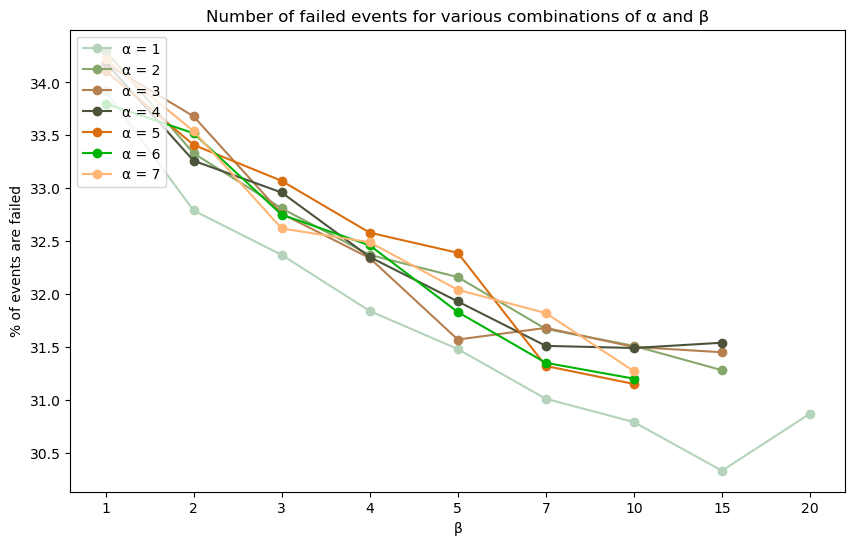

In [23]:
import matplotlib.ticker as ticker

# Assuming 'df' is your DataFrame
# Pivot your DataFrame as needed (if it is not already in the right format)
# Define the specific order of 'b' values you want to display on the x-axis
b_order = ['1', '2', '3', '4', '5', '7', '10', '15', '20']  # Adjust this list as needed

# Filter and convert 'b' to int for comparison, then set it as the DataFrame index
df1 = df[df['b'].astype(int).isin([int(x) for x in b_order])]
df1['b'] = pd.Categorical(df1['b'], categories=b_order, ordered=True)
df1.sort_values('b', inplace=True)
df1 = df1[df1['a'].astype(int) < 10]
df1 = df1[df1['b'].astype(int) < 21]
pivoted_df = df1.pivot(index='b', columns='a', values='Lost trips percentage')

colors = ['#B4D3BA', '#86A86B', '#B57F50', '#4B543B', '#DB6F10', '#00B307', '#FFB674', '#000000']

# Start plotting
fig, ax = plt.subplots(figsize=(10, 6))  # You can adjust the size as needed

# Plot each column

for i, column in enumerate(pivoted_df.columns):
    color = colors[i % len(colors)]  # Cycle through the color list
    ax.plot(pivoted_df.index, pivoted_df[column], marker='o', color=color, label=f'α = {column}')

# Customize the plot to match the uploaded image
ax.set_title('Number of failed events for various combinations of α and β')
ax.set_xlabel('β')
ax.set_ylabel('% of events are failed')
ax.legend(loc='upper left')

# It looks like the original plot uses a specific tick locator for the x-axis
ax.xaxis.set_major_locator(ticker.MaxNLocator(integer=True))

# Show the plot
plt.show()

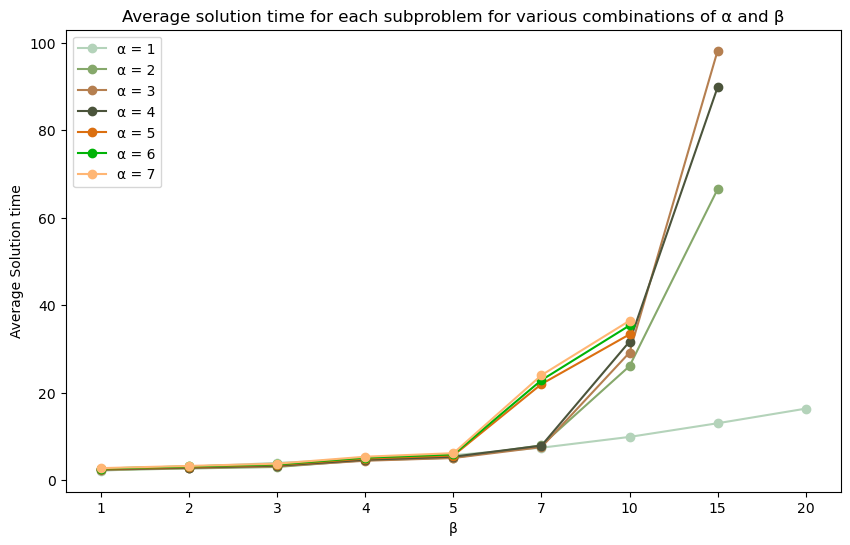

In [24]:
import matplotlib.ticker as ticker

# Assuming 'df' is your DataFrame
# Pivot your DataFrame as needed (if it is not already in the right format)
# Define the specific order of 'b' values you want to display on the x-axis
b_order = ['1', '2', '3', '4', '5', '7', '10', '15', '20']  # Adjust this list as needed

# Filter and convert 'b' to int for comparison, then set it as the DataFrame index
df1 = df[df['b'].astype(int).isin([int(x) for x in b_order])]
df1['b'] = pd.Categorical(df1['b'], categories=b_order, ordered=True)
df1.sort_values('b', inplace=True)
df1 = df1[df1['a'].astype(int) < 10]
df1 = df1[df1['b'].astype(int) < 21]
pivoted_df = df1.pivot(index='b', columns='a', values='avg_solution_time')

colors = ['#B4D3BA', '#86A86B', '#B57F50', '#4B543B', '#DB6F10', '#00B307', '#FFB674']

# Start plotting
fig, ax = plt.subplots(figsize=(10, 6))  # You can adjust the size as needed

# Plot each column

for i, column in enumerate(pivoted_df.columns):
    color = colors[i % len(colors)]  # Cycle through the color list
    ax.plot(pivoted_df.index, pivoted_df[column], marker='o', color=color, label=f'α = {column}')

# Customize the plot to match the uploaded image
ax.set_title('Average solution time for each subproblem for various combinations of α and β')
ax.set_xlabel('β')
ax.set_ylabel('Average Solution time')
ax.legend(loc='upper left')

# It looks like the original plot uses a specific tick locator for the x-axis
ax.xaxis.set_major_locator(ticker.MaxNLocator(integer=True))

# Show the plot
plt.show()